<a href="https://colab.research.google.com/github/kroy900/batch.scripts/blob/master/s_r_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
!pip install mpl_finance
!pip install pandas_ta
!pip install yfinance
!pip install talib-binary

     |████████████████████████████████| 115 kB 5.1 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=aa725976b98ac75221d694441712d9d9bed148239b03130f50562816eea81db3
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but yo

In [4]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance
from talib import RSI
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from numpy.ma.core import harden_mask
import plotly.graph_objects as go


plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)


In [5]:
name = 'BEL.NS'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15", end="2022-05-06")
#df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df['Open'] = df['Open'].round(3)
df['High'] = df['High'].round(3)
df['Low'] = df['Low'].round(3)
df['Close'] = df['Close'].round(3)

# Reset Index and include date in fields. Date no longer Index
#df.reset_index(inplace=True)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

#df.info()
df.tail()

,Date,Open,High,Low,Close
Date,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65
2022-04-29,738274.0,247.75,249.85,236.75,238.55
2022-05-02,738277.0,235.00,239.40,233.70,238.15
2022-05-04,738279.0,239.00,239.85,228.80,231.20
2022-05-05,738280.0,234.85,238.40,232.00,234.90


In [6]:
# def EMA fast and slow parameters
fast = 5
slow = 12

# HMA fast and slow calculation
df['src1'] = ta.hma(df['Open'], fast).shift(1).round(2)
df['src2'] = ta.hma(df['Close'], slow).round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2
Date,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00


In [7]:
df['momm1'] = df.src1 - df.src1.shift(1)
df['momm2'] = df.src2 - df.src2.shift(1)
df['momm1'] = df['momm1'].round(2)
df['momm2'] = df['momm2'].round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2
Date,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29


In [8]:
def compare_values1(m,n):
  if m >= n:
    return m
  else:
    return 0.0  


In [9]:
def compare_values2(m,n):
  if m >= n:
    return 0.0
  else:
    return -m 

In [10]:
df['m1'] = df[['momm1' , 'momm2']].apply(lambda x: compare_values1(x['momm1'],x['momm2']),axis=1)
df['m2'] = df[['momm1' , 'momm2']].apply(lambda x: compare_values2(x['momm1'],x['momm2']),axis=1)

df['m1'] = df['m1'].round(2)
df['m2'] = df['m2'].round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,m2
Date,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,0.00
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,0.00
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,0.00
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,9.61
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,5.34


In [11]:
def percentage_calc(nom,div):
  return nom/div * 100

In [12]:
df['sm1'] = df.m1 - df.m2
df['sm2'] = df.m1 + df.m2

df['sm1'] = df['sm1'].round(2)
df['sm2'] = df['sm2'].round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,m2,sm1,sm2
Date,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,0.00,-1.23,-1.23
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,0.00,2.45,2.45
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,0.00,0.69,0.69
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,9.61,-9.61,9.61
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,5.34,-5.34,5.34


In [13]:
df['cmo'] = df[['sm1' , 'sm2']].apply(lambda x: percentage_calc(x['sm1'],x['sm2']),axis=1)

df['cmo'] = df['cmo'].round(2)
df.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,m2,sm1,sm2,cmo
Date,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,0.00,-1.23,-1.23,100.0
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,0.00,2.45,2.45,100.0
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,0.00,0.69,0.69,100.0
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,9.61,-9.61,9.61,-100.0
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,5.34,-5.34,5.34,-100.0


In [14]:
#df['h'] = max(df.High , df.High.shift(1), axis=1)
df['h'] = df['High'].rolling(2).max().round(2)
df['l'] = df['Low'].rolling(2).min().round(2)

df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,m2,sm1,sm2,cmo,h,l
Date,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,0.00,-1.23,-1.23,100.0,250.00,242.85
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,0.00,2.45,2.45,100.0,250.00,236.75
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,0.00,0.69,0.69,100.0,249.85,233.70
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,9.61,-9.61,9.61,-100.0,239.85,228.80
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,5.34,-5.34,5.34,-100.0,239.85,228.80


In [15]:
# def SMA parms
len5 = 2

# SMA  calculation
df['sma_h'] = ta.sma(df['h'], len5).round(2)
df['sma_l'] = ta.sma(df['l'], len5).round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,m2,sm1,sm2,cmo,h,l,sma_h,sma_l
Date,,,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,0.00,-1.23,-1.23,100.0,250.00,242.85,251.70,242.85
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,0.00,2.45,2.45,100.0,250.00,236.75,250.00,239.80
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,0.00,0.69,0.69,100.0,249.85,233.70,249.93,235.22
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,9.61,-9.61,9.61,-100.0,239.85,228.80,244.85,231.25
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,5.34,-5.34,5.34,-100.0,239.85,228.80,239.85,228.80


In [16]:
# ta.dev calculation
df['dev_h'] = df['sma_h'].sub(df['h'], axis = 0).round(2)
df['dev_l'] = df['l'].sub(df['sma_l'], axis = 0).round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,m2,sm1,sm2,cmo,h,l,sma_h,sma_l,dev_h,dev_l
Date,,,,,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,0.00,-1.23,-1.23,100.0,250.00,242.85,251.70,242.85,1.70,0.00
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,0.00,2.45,2.45,100.0,250.00,236.75,250.00,239.80,0.00,-3.05
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,0.00,0.69,0.69,100.0,249.85,233.70,249.93,235.22,0.08,-1.52
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,9.61,-9.61,9.61,-100.0,239.85,228.80,244.85,231.25,5.00,-2.45
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,5.34,-5.34,5.34,-100.0,239.85,228.80,239.85,228.80,0.00,0.00


In [17]:
# compare dev & sma values
import math
def dev_sma_comp1(a,b):
  if a > 0:
    return np.nan
  else:
    return b 


In [18]:
df['h1'] = df[['dev_h' , 'h']].apply(lambda x: dev_sma_comp1(x['dev_h'],x['h']),axis=1)
df['l1'] = df[['dev_l' , 'l']].apply(lambda x: dev_sma_comp1(x['dev_l'],x['l']),axis=1)

df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,...,sm2,cmo,h,l,sma_h,sma_l,dev_h,dev_l,h1,l1
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,...,-1.23,100.0,250.00,242.85,251.70,242.85,1.70,0.00,NaN,242.85
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,...,2.45,100.0,250.00,236.75,250.00,239.80,0.00,-3.05,250.00,236.75
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,...,0.69,100.0,249.85,233.70,249.93,235.22,0.08,-1.52,NaN,233.70
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,...,9.61,-100.0,239.85,228.80,244.85,231.25,5.00,-2.45,NaN,228.80
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,...,5.34,-100.0,239.85,228.80,239.85,228.80,0.00,0.00,239.85,228.80


In [19]:
# Fix NaN
df['hpivot'] = df['h1'].fillna(method='ffill')
df['lpivot'] = df['l1'].fillna(method='ffill')

df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,...,h,l,sma_h,sma_l,dev_h,dev_l,h1,l1,hpivot,lpivot
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,...,250.00,242.85,251.70,242.85,1.70,0.00,NaN,242.85,253.40,242.85
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,...,250.00,236.75,250.00,239.80,0.00,-3.05,250.00,236.75,250.00,236.75
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,...,249.85,233.70,249.93,235.22,0.08,-1.52,NaN,233.70,250.00,233.70
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,...,239.85,228.80,244.85,231.25,5.00,-2.45,NaN,228.80,250.00,228.80
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,...,239.85,228.80,239.85,228.80,0.00,0.00,239.85,228.80,239.85,228.80


In [20]:
# Calculate RSI
length = 9

df['RSI'] = ta.rsi(df['Close'], length).round(2)
df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,...,l,sma_h,sma_l,dev_h,dev_l,h1,l1,hpivot,lpivot,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,...,242.85,251.70,242.85,1.70,0.00,NaN,242.85,253.40,242.85,60.02
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,...,236.75,250.00,239.80,0.00,-3.05,250.00,236.75,250.00,236.75,46.36
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,...,233.70,249.93,235.22,0.08,-1.52,NaN,233.70,250.00,233.70,45.78
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,...,228.80,244.85,231.25,5.00,-2.45,NaN,228.80,250.00,228.80,36.80
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,...,228.80,239.85,228.80,0.00,0.00,239.85,228.80,239.85,228.80,43.44


In [21]:
# Function to find Support & Resistance

# Support
def Support(rsi1,cmo1,lpivot1):
  if rsi1 < 25 and cmo1 > 50 and cmo1 > lpivot1:  
    return 1
  else:
    return 0

# Resistance
def Resistance(rsi1,cmo1,hpivot1):
  if rsi1 > 75 and cmo1 < -50 and cmo1 < hpivot1:
    return 1
  else:
    return 0


In [22]:
# Find Sup & Res boolean switch

df['sup'] = df[['RSI' , 'cmo' , 'lpivot']].apply(lambda x: Support(x['RSI'],x['cmo'],x['lpivot']),axis=1)
df['res'] = df[['RSI' , 'cmo' , 'hpivot']].apply(lambda x: Resistance(x['RSI'],x['cmo'],x['hpivot']),axis=1)

df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,...,sma_l,dev_h,dev_l,h1,l1,hpivot,lpivot,RSI,sup,res
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,738273.0,250.00,250.00,243.50,246.65,245.76,248.11,-1.23,-1.88,-1.23,...,242.85,1.70,0.00,NaN,242.85,253.40,242.85,60.02,0,0
2022-04-29,738274.0,247.75,249.85,236.75,238.55,248.21,244.95,2.45,-3.16,2.45,...,239.80,0.00,-3.05,250.00,236.75,250.00,236.75,46.36,0,0
2022-05-02,738277.0,235.00,239.40,233.70,238.15,248.90,241.57,0.69,-3.38,0.69,...,235.22,0.08,-1.52,NaN,233.70,250.00,233.70,45.78,0,0
2022-05-04,738279.0,239.00,239.85,228.80,231.20,239.29,237.29,-9.61,-4.28,0.00,...,231.25,5.00,-2.45,NaN,228.80,250.00,228.80,36.80,0,0
2022-05-05,738280.0,234.85,238.40,232.00,234.90,233.95,234.00,-5.34,-3.29,0.00,...,228.80,0.00,0.00,239.85,228.80,239.85,228.80,43.44,0,0


In [23]:
rslt_df = df[(df['sup'] == 1) | (df['res'] == 1)]
rslt_df.tail()

,Date,Open,High,Low,Close,src1,src2,momm1,momm2,m1,...,sma_l,dev_h,dev_l,h1,l1,hpivot,lpivot,RSI,sup,res
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-08,738253.0,238.70,242.20,234.95,239.60,221.54,231.01,-0.43,6.45,0.0,...,219.38,-2.15,2.17,242.20,NaN,242.20,217.20,86.16,0,1
2022-04-13,738258.0,244.05,250.25,244.05,247.10,248.91,247.97,2.88,4.49,0.0,...,237.45,-1.02,0.00,250.25,237.45,250.25,237.45,85.98,0,1
2022-04-18,738263.0,246.00,256.30,244.25,254.95,247.36,252.61,-1.55,4.64,0.0,...,240.75,-3.02,3.30,256.30,NaN,256.30,237.45,88.86,0,1
2022-04-19,738264.0,255.00,259.50,248.05,250.30,246.66,255.32,-0.70,2.71,0.0,...,244.15,-1.60,0.10,259.50,NaN,259.50,237.45,78.15,0,1
2022-04-22,738267.0,252.45,256.65,250.85,251.65,255.87,256.75,-0.57,-0.38,0.0,...,250.72,0.00,0.13,258.70,NaN,258.70,237.45,75.78,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 531 entries, 2020-03-16 to 2022-05-05
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    531 non-null    float64
 1   Open    531 non-null    float64
 2   High    531 non-null    float64
 3   Low     531 non-null    float64
 4   Close   531 non-null    float64
 5   src1    525 non-null    float64
 6   src2    518 non-null    float64
 7   momm1   524 non-null    float64
 8   momm2   517 non-null    float64
 9   m1      531 non-null    float64
 10  m2      524 non-null    float64
 11  sm1     524 non-null    float64
 12  sm2     524 non-null    float64
 13  cmo     522 non-null    float64
 14  h       530 non-null    float64
 15  l       530 non-null    float64
 16  sma_h   529 non-null    float64
 17  sma_l   529 non-null    float64
 18  dev_h   529 non-null    float64
 19  dev_l   529 non-null    float64
 20  h1      338 non-null    float64
 21  l1      290 non-null

In [25]:
df.shape
df.shape[0]
df.shape[0]-2

529

In [26]:
# Support
def isSupport(df,i):
  support = df['sup'][i] == 1
  return support 

# Resistance
def isResistance(df,i):
  resistance = df['res'][i] == 1
  return resistance

#rslt_df = df[(df['sup'] == 1) | (df['res'] == 1)]


In [27]:
levels = []
levelr = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levelr.append((i,df['High'][i]))


In [28]:
print(*levels)

(35, 56.166) (130, 87.26)


In [29]:
print(*levelr)

(63, 77.128) (67, 80.393) (68, 81.813) (69, 83.942) (73, 92.696) (74, 97.995) (77, 97.428) (78, 96.055) (99, 107.79) (102, 109.21) (171, 103.801) (172, 105.383) (176, 104.808) (177, 109.123) (184, 117.465) (191, 117.657) (200, 122.739) (201, 126.383) (204, 129.451) (205, 128.253) (206, 129.979) (207, 130.362) (283, 140.136) (286, 146.648) (291, 154.629) (316, 166.479) (320, 172.207) (321, 175.194) (322, 182.049) (326, 179.601) (373, 205.731) (513, 237.9) (514, 242.2) (517, 250.25) (518, 256.3) (519, 259.5) (522, 256.65)


In [32]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='green')
  fig.show()

  for level in levelr:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()


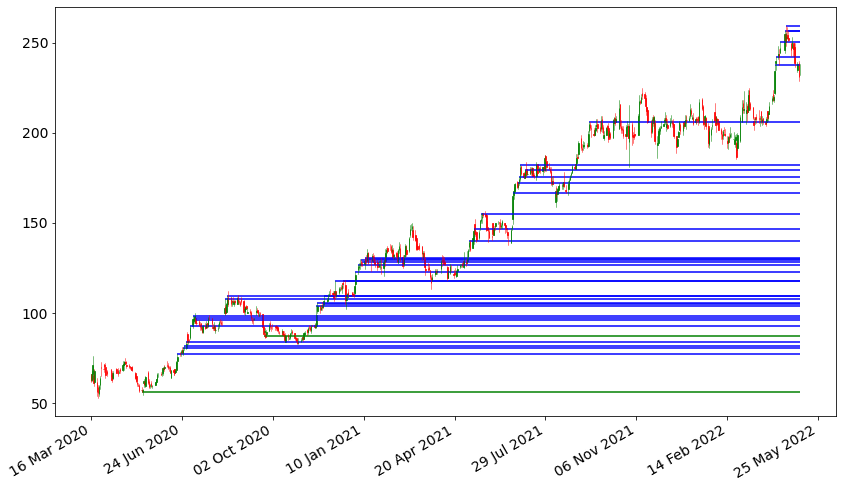

In [33]:
plot_all()


In [38]:
# Get rid of close levels and make chart clean
s =  np.mean(df['High'] - df['Low'])
print(s)

5.164561205273079


In [ ]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0


In [ ]:
levels = []
levelr = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levelr.append((i,l))


In [34]:
levels

[(35, 56.166), (130, 87.26)]

In [35]:
levelr

[(63, 77.128),
 (67, 80.393),
 (68, 81.813),
 (69, 83.942),
 (73, 92.696),
 (74, 97.995),
 (77, 97.428),
 (78, 96.055),
 (99, 107.79),
 (102, 109.21),
 (171, 103.801),
 (172, 105.383),
 (176, 104.808),
 (177, 109.123),
 (184, 117.465),
 (191, 117.657),
 (200, 122.739),
 (201, 126.383),
 (204, 129.451),
 (205, 128.253),
 (206, 129.979),
 (207, 130.362),
 (283, 140.136),
 (286, 146.648),
 (291, 154.629),
 (316, 166.479),
 (320, 172.207),
 (321, 175.194),
 (322, 182.049),
 (326, 179.601),
 (373, 205.731),
 (513, 237.9),
 (514, 242.2),
 (517, 250.25),
 (518, 256.3),
 (519, 259.5),
 (522, 256.65)]

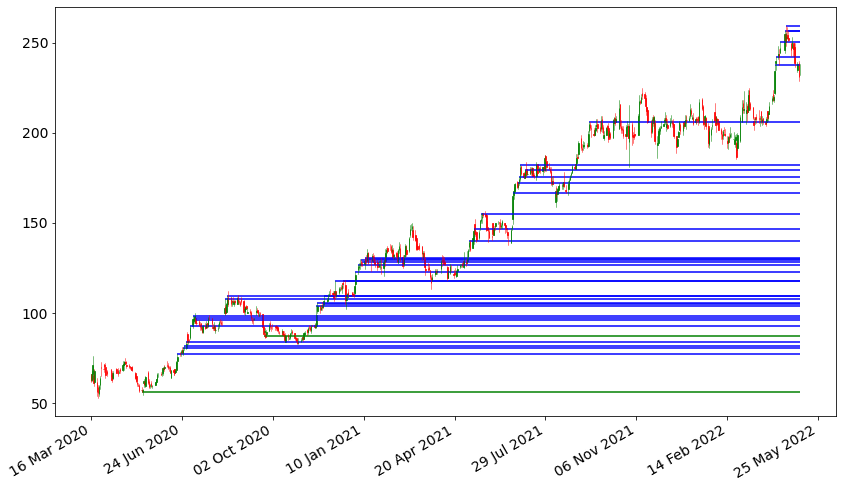

In [36]:
plot_all()
